## Install and load packages

In [1]:
# install.packages("devtools")
# devtools::install_github("langcog/wordbankr")
library("dplyr")
library("wordbankr")
library("stringr")
library("ggplot2")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [75]:
ls("package:wordbankr")

[1] "fit_aoa"                 "get_administration_data"
[3] "get_crossling_items"     "get_instrument_data"    
[5] "get_instruments"         "get_item_data"          
[7] "match_crossling_items"

In [2]:
admins <- 
  get_administration_data() %>%
  select(data_id, age, language, form)

items <- 
  get_item_data() %>%
  mutate(num_item_id = as.numeric(substr(item_id, 6, nchar(item_id))),
         definition = tolower(definition))

words <- 
  items %>%
  filter(type == "word", !is.na(uni_lemma), form == "WG")

In [16]:
unique(items$language)

[1] "Croatian"               "German"                 "Russian"               
 [4] "Swedish"                "Turkish"                "Danish"                
 [7] "French (Quebec)"        "English (American)"     "Spanish"               
[10] "Italian"                "Norwegian"              "Cantonese"             
[13] "Mandarin"               "Hebrew"                 "British Sign Language" 
[16] "Slovak"                 "English (British)"      "American Sign Language"
[19] "Cypriot Greek"          "Kigiriama"              "Kiswahili"             
[22] "Czech"                  "English (Australian)"   "Latvian"               
[25] "Korean"

In [10]:
dim(items)

[1] 27387    11

In [12]:
dim(words)

[1] 5150   11

In [3]:
starting_sound <-
  words %>%
  mutate(start = str_extract(definition, "^[a-zA-Z]")) %>%
  filter(!is.na(start))

In [48]:
dim(starting_sound)

[1] 3939   12

In [61]:
start_freq <- table(starting_sound$start)
start_freq


  a   b   c   d   e   f   g   h   i   j   k   l   m   n   o   p   q   r   s   t 
186 397 246 200  77 154 180 169  73  52 205 150 236 122  92 306  13  95 423 288 
  u   v   w   y   z 
 55 106  45  41  28 

In [66]:
head(sort(start_freq, decreasing = TRUE))


  s   b   p   t   c   m 
423 397 306 288 246 236 

# Histogram of Starting Sounds

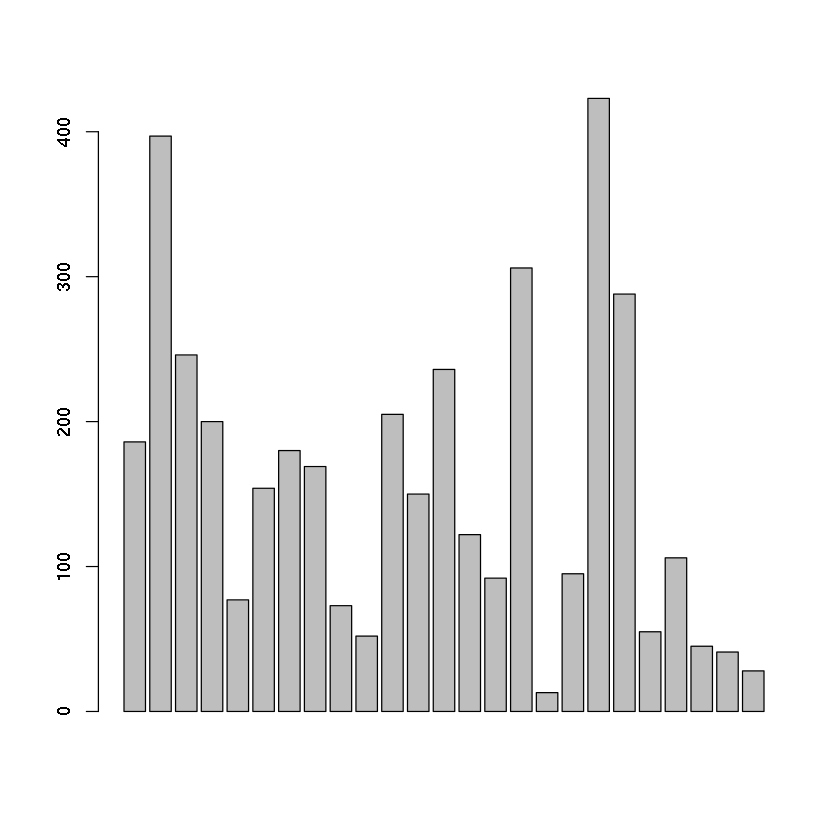

In [62]:
barplot(as.vector(start_freq))

Notice that words that start with p, b, or m are part of the top 6 most frequently acquired words by children.

# Plot 2

In [3]:
english_ws_admins <- get_administration_data("English (American)", "WS")

df <- get_instrument_data(language = "English (American)",
                                   form = "WS",
                                   administrations = english_ws_admins)

In [ ]:
start_produce <-
  df %>%
  filter(value == "produces") %>%
  inner_join(words, by = "num_item_id") %>%
  group_by(num_item_id) %>%
  summarize(median = median(age))

In [4]:
start_produce <-
  df %>%
  filter(value == "produces")

In [ ]:
plot(start_produce$median, start_produce$start)

In [4]:
words

item_id,definition,language,form,type,category,lexical_category,lexical_class,uni_lemma,complexity_category,num_item_id
item_81,gristi,Croatian,WG,word,action_words,predicates,verbs,bite,,81
item_264,puhati,Croatian,WG,word,action_words,predicates,verbs,blow,,264
item_269,razbiti,Croatian,WG,word,action_words,predicates,verbs,break,,269
item_64,donijeti,Croatian,WG,word,action_words,predicates,verbs,bring,,64
item_153,kupiti,Croatian,WG,word,action_words,predicates,verbs,buy,,153
item_36,čistiti,Croatian,WG,word,action_words,predicates,verbs,clean (action),,36
item_384,zatvoriti,Croatian,WG,word,action_words,predicates,verbs,close,,384
item_243,plakati,Croatian,WG,word,action_words,predicates,verbs,cry,,243
item_246,plesati,Croatian,WG,word,action_words,predicates,verbs,dance,,246
item_42,crtati,Croatian,WG,word,action_words,predicates,verbs,draw,,42


In [5]:
df

data_id,value,num_item_id,age,comprehension,production,language,form,birth_order,ethnicity,sex,zygosity,norming,longitudinal,source_name,mom_ed
129242,produces,1,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,2,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,3,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,produces,4,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,5,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,6,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,produces,7,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,8,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,produces,9,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary
129242,,10,27,497,497,English (American),WS,Fourth,Hispanic,Female,NA,TRUE,FALSE,Marchman,Some Secondary


In [6]:
dim(start_produce)

[1] 1507649      16